# Finding the Eigenenergies of the Finite Sqaure Well

One of the more useful numerical tools you can learn is [root finding](https://en.wikipedia.org/wiki/Root-finding_algorithms). Many problems can be cast as an algebraic problem where you are seeking the scalar value where a function goes to zero. Mathematically, we characterize this problem as seeking the values $x^*$ for a continuous function $f(x)$ where 

$$f(x^*)=0$$

In some cases (e.g., quadratic polynomials), you might be able to find $x^{*}$ exactly. But in most cases, that is not the case, and you will need to instead find an approximate $x^{*}$ and characterize the numerical error in the value you determined.

In this notebook, we will work through the [Bisection method](https://en.wikipedia.org/wiki/Bisection_method) for finding roots of equations. This method is relatively robust, but does have a [few drawbacks](https://en.wikipedia.org/wiki/Bisection_method#Analysis) for cetain kinds of functions and problems.

We will start with finding the intersections of two functions. Later, we will apply this to the finite square well to determine the approximate eigenenergies. As usual, we go through some of the conceptual elements before having you write your own code.

First, we import the libraries we need for numerics and plotting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Conceptual Idea of the Bisection Method

### 1.1 Define the functions

We are seeking the intersection points of two equations:

$$f_1(x) = 100\cos(x)\;\mathrm{and}\;f_2(x) = x^2 + 2x - 3$$

which we cast as a root finding problem by subtracting them:

$$f(x) = f_1(x) - f_2(x) = 100\cos(x) - x^2 - 2x + 3$$

We define these scalar functions below.

In [2]:
def f1(x): ## Defining f1
    
    return 100*np.cos(x)
    
def f2(x): ## Defining f2
    
    return x**2 + 2*x - 3

def f(x): ## Defining f
    
    return f1(x)-f2(x)

### 1.2 Plotting the functions

The next thing we will do is to plot the functions separately in order to see where and how they intersect. We create and array of numbers to plot the two functions.

As you can see there are several intersections between the two functions.

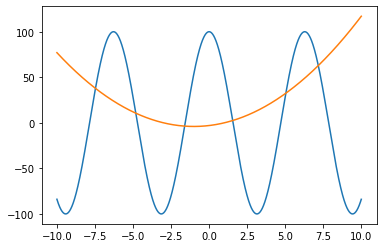

In [3]:
xarr = np.arange(-10,10,0.001)

y1 = f1(xarr)
y2 = f2(xarr)

plt.plot(xarr,y1)
plt.plot(xarr,y2)

### 1.3 Plot the difference between the functions

As we want to cast this problem as a root finding problem, it would be better to plot the difference between two functions and a line that indicates the $y=0$ line.

<font size=8 color="#009600">&#9998;</font> Do This.

* Plot the difference between the two functions, and the $y=0$ line to show the root finding problem you are going to solve. For plotting a horizontal like consider using `hlines()`.

In [4]:
## your code here

Let's zoom in on a particular root, so we can get a sense of what we might guess for the bounds. In the plot above, you should see a root that exists somewhere in the $x=-2$ ot $x=-1.5$ region. 


<font size=8 color="#009600">&#9998;</font> Do This.

* Replot the figure above zoomed in to see approximately where that root is located. 
* Include the $y=0$ line using `hlines()` or something similar.

In [5]:
## your code here

## 2. Understanding the Bisection Method Conceptually

There are many [root-finding algorithms](https://en.wikipedia.org/wiki/Root-finding_algorithms#Iterative_methods) and all of them rely on making some guess for the root or the bounds where the root is thought to exist. The Bisection Method is a "bracketing" method where we guess the region where we think the root will exist, and systematically bring cut the bracket in half (hence, bisection) until we are happy with our approximation.

### 2.1 Visualizing the Bracketing process

For the function $f(x)$ that we constructed earlier, we will work through the Bisection Method and visualize each step for three steps to see how the process works.

#### 2.1.1 Make your first guess

Below, we have written some code that picks two locations near the root we zoomed in on before. The function is plotted along with the $y=0$ line. In addition, we have plotted the guessed values $(a,f(a))$ and $(b,f(b))$ as stars and then we have translated those values to the $y=0$ line as circles.

Here you can see we have chosen two values on either side of the root ($a$ and $b$) and we have taken care to make sure that the function takes on different signs for $a$ and $b$ ($f(a)<0$ and $f(b)>0$). This is important for the bisection method as it uses the signs of the function to determine how to move the bracket in.

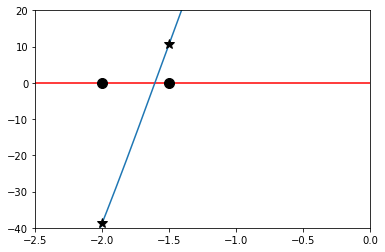

In [6]:
## First guesses in the neighborhood of the root

a = -2
b = -1.5

fa = f(a)
fb = f(b)

y = f(xarr)
plt.plot(xarr,y)
plt.hlines(0,-10,10, 'r')

## Value of the function at a and b
plt.plot(a,fa,'k*', markersize=10)
plt.plot(b,fb,'k*', markersize=10)

## Moving a and b to x=0 to show bracketing
plt.plot(a,0,'ko', markersize=10)
plt.plot(b,0,'ko', markersize=10)

plt.axis([-2.5,0,-40,20]);

#### 2.1.2 Compute the midpoint and determine the value of the function

The next step is to compute the midpoint between your guesses ($c=\dfrac{a+b}{2}$) and then compute the value of the function at the midpoint ($f(c)$. Below, we compute both and print $f(c)$.

In [7]:
c = (a+b)/2
f3 = f(c)

print(f3)

-14.38710556494921


#### 2.1.3 Shift the bracket

The next step is to compare the sign of $f(c)$ to the signs of $f(a)$ and $f(b)$. Whichever value shares the same sign as $f(c)$ is then replaced by $c$ and $f(c)$. If you have followed this notebook, then the the sign of $f(c)$ is negative and thus replaces $f(a)$. Below, we perform that replacement and graph the result.

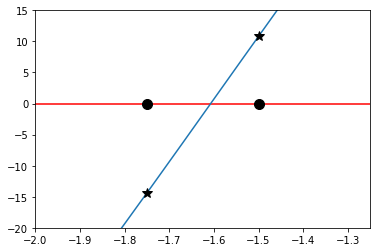

In [8]:
a = c
fa = f(c)

plt.plot(xarr,y)
plt.hlines(0,-10,10, 'r')

plt.plot(a,fa,'k*', markersize=10)
plt.plot(b,fb,'k*', markersize=10)

plt.plot(a,0,'ko', markersize=10)
plt.plot(b,0,'ko', markersize=10)

plt.axis([-2.0,-1.25,-20,15]);

#### 2.1.4 Perform two more iterations

Now that you have seen how one iteration is done and what the result is, perform two more iterations by hand and graph the results for each iteration. You may reuse code that was written above.

<font size=8 color="#009600">&#9998;</font> Do This.
* Perform two more iterations of the Bisection Method
* Plot the resulting points on both the function, and the line $y=0$.

**Question:** What are the bounds on the estimated value for the root after these three iterations?

In [9]:
## your code here (next iteration)

In [10]:
## your code here (one more iteration)

## 3. Automate the process

Now that you have seen conceptually how the Bisection Method works, let's automate the process by writing a function `Bisection()` that will take your guesses ($a$, $b$) and a function, $f$, and return an estimate for the root. In doing this, you write a function that will have three required parameters, and two optional ones that handle the tolerance and maximum number of iterations. To define it, I would write something like:

``def Bisection(a, b, f, tol=0.01, maxiter=100):``


The body of the function should run until the tolerance is met or the number of iterations exceeds the maximum. Here's the pseudocode to construct this function.

```

initalize error and iterations

while error greater than tolerance and iterations less than maximum

    compute f(a) and f(b)
    
    check that f(a) and f(b) have different signs; break if they don't
    
    compute midpoint, c, and value of f at c, f(c)
    
    check if sign of f(c) is same as f(a)
        replace a with c and f(a) with f(c)
        compute error as abs(f(a)-f(b))
        increment iterations
        
    check if sign of f(c) is same as f(b)
        replace b with c and f(b) with f(c)
        compute error as abs(f(a)-f(b))
        increment iterations
        
        
return c, f(c), error, and iterations

```

<font size=8 color="#009600">&#9998;</font> Do This.
* Write this function
* Use it to estimate the root of the function we have been working with
* Plot the function, $y=-0$ line, and the estimated root

**Question:** What is that estimated root?

In [11]:
### your code here

## 4. Returning to the Finite Square Well

Now that you have a working function that should be able to take a 1D function and return an estimated root, let's return to the Finite Square Well and estimate the eigenenergies. The results derived in McIntyre led to two relationships:

$$z\tan z = \sqrt{z_0^2-z^2}$$

$$-z\cot z = \sqrt{z_0^2-z^2}$$

where $z = ka = \sqrt{\dfrac{2mEa^2}{\hbar^2}}$ and $z = ka = \sqrt{\dfrac{2mV_0a^2}{\hbar^2}}$. Conceptually, $z$ is a measure of the energy of the particle and $z_0$ is a measure of the well-depth. We are seeking the roots of the following two equations:

$$j_1(z) = z\tan z - \sqrt{z_0^2-z^2}$$

$$j_2(z) = \sqrt{z_0^2-z^2} + z\cot z$$

Below, we have defined all the equations that are needed for this root finding problem. We selected $z_0 = 6$ like McIntyre. Thus we should expect to find:

$$z_1 \approx 1.34$$
$$z_2 \approx 2.68$$
$$z_3 \approx 3.99$$
$$z_4 \approx 5.23$$

as in McIntyre.

In [12]:
## Defining the functions for the root finding problem

def g1(z):
    
    return z*np.tan(z)

def h(z):
    
    z0 = 6    ## Proxy for the depth of the well
    return np.sqrt(z0**2-z**2)

def j1(z):
    
    return g1(z)-h(z)


def g2(z):
    
    return -z/np.tan(z)

def j2(z):
    
    return h(z)-g2(z)

### 4.1 Plot the intersections

As we have done previously, let's look at the intersections of the two functions. Above, we defined $g_1(z)$, $g_2(z)$, and $h(z)$. For a range of 0 to $2\pi$ visualize the three functions. Effectively, you are recreating Fig 5.16 from McIntyre.

<font size=8 color="#009600">&#9998;</font> Do This.
* Graph the three functions over the range 0 to $2 \pi$.

**Question:** How many roots do you see? What is going on with the perfectly vertical lines that seem to appear?

In [13]:
## your code here

### 4.2 Plot the root finding problem

Let's recast our work as finding the roots of $j_1(z)$ and $j_2(z)$.

<font size=8 color="#009600">&#9998;</font> Do This.
* Graph $j_1(z)$ and $j_2(z)$ for the range 0 to $2\pi$.

**Question:** Do you see them same number of roots? Again, what is going on with the perfectly vertical lines?

In [14]:
## your code here

### 4.3 Find the roots

Using the function that you wrote above, find the roots of $j_1(z)$ and $j_2(z)$. Make sure to keep track of the value of the function at the root and the number of iterations it took to find the root. You are free to choose your tolerance, but do not make it too small, or your function may run for a long time.

<font size=8 color="#009600">&#9998;</font> Do This.
* Use your function to the find the roots of $j_1(z)$ and $j_2(z)$
* Compare your estimated results to those from McIntyre (also posted above).

**Question:** How close are your predictions of the value of the function to zero?

**Question:** How many iterations did it take to find each root?

In [15]:
## your code here

## 5. Using known libraries

Of course, these root finding methods are well known in computational and mathematical physics and are used widely. In fact, some of the original methods were developed in the 16th and 17th century and used by European, Indian, and Japanese mathematicians widely before the 18th century.

Python has a library called ``scipy`` that has many tools useful for computational physics. In the ``optimize`` module, there is a method called ``root_scalar``. You can find details [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html). This method allows us to find roots without writing our own method. In addition, there are many potential methods that are available and already written for the ``root_scalar`` method including the [Bisection Method](https://docs.scipy.org/doc/scipy/reference/optimize.root_scalar-bisect.html#optimize-root-scalar-bisect).

Below, we import the ``optimize`` module and use it to find the first root of $j_1(z)$. Take note of the structure of the call and what it returns.

In [16]:
from scipy import optimize

sol = optimize.root_scalar(j1, bracket = [1, 1.4], method = 'bisect')
print(sol.root, sol.iterations)

1.3447510453770521 38


### 5.1 Use ``root_scalar``

<font size=8 color="#009600">&#9998;</font> Do This.
* Use ``root_scalar`` with the ``bisect`` method to find the remaining roots.

**Question:** How does the number of iterations used by ``root_scalar`` compare to your function?

In [17]:
## your code here

### 5.2 Use a different method with ``root_scalar``

One of the great things about ``scipy`` is that often many different methods are available for solving the same kind of problem. For example, one improved method for finding roots is [Brent's method](https://en.wikipedia.org/wiki/Brent%27s_method), which is a hybridized appraoch that is often more efficient than the Bisection method. This approach can be employed with ``root_scalar`` by making a simple change to the method call. Documentation on this method is [here](https://docs.scipy.org/doc/scipy/reference/optimize.root_scalar-brentq.html#optimize-root-scalar-brentq).

<font size=8 color="#009600">&#9998;</font> Do This.
* Find the roots using the ``brentq`` method.

**Question:** Is the accuracy improved? How about the number of iterations?

In [18]:
## your code here